In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from detecto.utils import read_image
from detecto.core import Dataset

jpg_folder = '../data/data_jpgs_exist/'
voc_folder = '../data/pascal_voc_labels_exist/'

# Simple Object Detection Training Pipeline

Here is a simple object detection tutorial using detecto.

## Display Data

In [2]:
images = os.listdir(jpg_folder)
sample_image_file = images[0]
sample_image_file

'794c2473-8e8e-4f2b-989a-7148d0737c95.jpg'

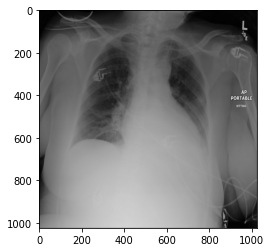

In [3]:
image = read_image(jpg_folder + sample_image_file)
plt.imshow(image)
plt.show()

## Creating Dataset

In [4]:
voc_folder

'../data/pascal_voc_labels_exist/'

In [5]:
from torchvision import transforms
from detecto.utils import normalize_transform

custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.2),
    transforms.ToTensor(),
    normalize_transform(),
])

dataset = Dataset(voc_folder, jpg_folder) # , transform=custom_transforms)

In [7]:
dataset._csv.shape

(9555, 9)

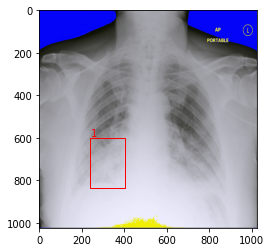

In [8]:
from detecto.visualize import show_labeled_image

image, targets = dataset[0]
show_labeled_image(image, targets['boxes'], targets['labels'])

## Training

In [9]:
from detecto.core import DataLoader, Model

labels = ['1']
model = Model(labels)

In [ ]:
model.fit(dataset, verbose=True)

  0%|          | 1/6012 [00:00<19:18,  5.19it/s]

Epoch 1 of 10
Begin iterating over training dataset


  9%|▉         | 538/6012 [04:48<1:11:14,  1.28it/s]